Вариант №2.
Вносим следующие изменения:
1. Увеличено количество нейронов в первом скрытом слое до 10
2. Добавлен второй скрытый слой из 8 нейронов

Точность измененной сети ухудшилась и составила 83,1%


In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<ipython-input-18-6fd13d7f3f40>:14: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-x))


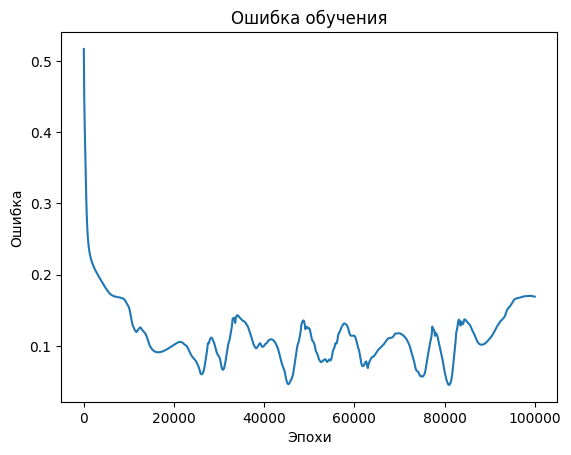

Точность нейронной сети: 83.10%


In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Определение функций активации
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Нормализация данных
def normalize(X):
    scaler = StandardScaler()
    return scaler.fit_transform(X)

# Загрузка данных
iris_data = pd.read_csv("/content/sample_data/Iris.csv")
iris_data['Species'].replace(['Iris-setosa', 'Iris-virginica', 'Iris-versicolor'], [0, 1, 2], inplace=True)

# Формирование входных данных
X = iris_data.drop("Species", axis=1).values
X = normalize(X)

# Формирование выходных данных
y = iris_data['Species'].values
y = to_one_hot(y)

# Разделение данных на тренировочные и тестовые
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Инициализация весов сети
np.random.seed(0)
input_neurons = X_train.shape[1]
hidden_neurons1 = 10  # Увеличено количество нейронов в первом скрытом слое
hidden_neurons2 = 8   # Добавлен второй скрытый слой
output_neurons = y_train.shape[1]

w0 = 2 * np.random.random((input_neurons, hidden_neurons1)) - 1
w1 = 2 * np.random.random((hidden_neurons1, hidden_neurons2)) - 1
w2 = 2 * np.random.random((hidden_neurons2, output_neurons)) - 1

# Скорость обучения
learning_rate = 0.001  # Изменено значение

# Массив для ошибок
errors = []

# Процесс обучения
for i in range(100000):
    # Прямое распространение
    layer0 = X_train
    layer1 = sigmoid(np.dot(layer0, w0))
    layer2 = sigmoid(np.dot(layer1, w1))
    layer3 = sigmoid(np.dot(layer2, w2))

    # Обратное распространение
    layer3_error = y_train - layer3
    layer3_delta = layer3_error * sigmoid_deriv(layer3)

    layer2_error = np.dot(layer3_delta, w2.T)
    layer2_delta = layer2_error * sigmoid_deriv(layer2)

    layer1_error = np.dot(layer2_delta, w1.T)
    layer1_delta = layer1_error * sigmoid_deriv(layer1)

    # Обновление весов сети
    w2 += learning_rate * np.dot(layer2.T, layer3_delta)
    w1 += learning_rate * np.dot(layer1.T, layer2_delta)
    w0 += learning_rate * np.dot(layer0.T, layer1_delta)

    error = np.mean(np.abs(layer3_error))
    errors.append(error)

# Визуализация процесса обучения
plt.plot(errors)
plt.xlabel('Эпохи')
plt.ylabel('Ошибка')
plt.title('Ошибка обучения')
plt.show()

print("Точность нейронной сети: {:.2f}%".format((1 - error) * 100))
